<a href="https://colab.research.google.com/github/Batorejro/Machine-Learning-boot/blob/main/dane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values

In [ ]:
!pip install scikit-learn


In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__


'1.4.0'

Generacja danych

In [ ]:
data = {
    'size':['XL', 'L', 'M', np.nan, 'L', 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green', 'white'],
    'gender': ['female', 'male', np.nan, 'male', 'female', 'female', np.nan],
    'price': [199.0, 89.0, np.nan, 99.0, 129.0, 79.0, np.nan],
    'weight':[500, 450, 300, np.nan, 410, np.nan, 380],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no', np.nan]
    }

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no
6,M,white,NaN,NaN,380.0,NaN


kopia

In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   7 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 464.0+ bytes


Kontrola lack_off pokazuje gdzie jest brak danych (True)

In [ ]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False
6,True,False,True,True,False,True


In [ ]:
df.isnull().sum()

size      2
color     0
gender    2
price     2
weight    2
bought    1
dtype: int64

In [ ]:
df.isnull().sum().sum()

9

In [ ]:
df.isnull().sum() /len(df)

size      0.285714
color     0.000000
gender    0.285714
price     0.285714
weight    0.285714
bought    0.142857
dtype: float64

Klasa simpleimputer - uzupełnia dane

In [ ]:
df[['weight']]

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN
6,380.0


In [ ]:
from sklearn.impute import SimpleImputer
# strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['price']])



SimpleImputer()

In [ ]:
imputer.statistics_

array([119.])

In [ ]:
imputer.transform(df[['price']])

array([[199.],
       [ 89.],
       [119.],
       [ 99.],
       [129.],
       [ 79.],
       [119.]])

In [ ]:
df['price'] = imputer.transform(df[['price']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,119.0,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no
6,NaN,white,NaN,119.0,380.0,NaN


fit_transform - podstawianie danych

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=402.0)
imputer.fit_transform(df[['weight']])


array([[500.],
       [450.],
       [300.],
       [402.],
       [410.],
       [402.],
       [380.]])

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['L'],
       ['M'],
       ['L']], dtype=object)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['L'],
       ['M'],
       ['L']], dtype=object)

In [ ]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no
6,M,white,NaN,NaN,380.0,NaN


In [ ]:
df.isnull().sum()

size      1
color     0
gender    2
price     2
weight    2
bought    1
dtype: int64

In [ ]:
pd.isnull(df['gender'])

0    False
1    False
2     True
3    False
4    False
5    False
6     True
Name: gender, dtype: bool

zwraca tylko te kolumny gdzie brakuje danych dla wybranej kolumny

In [ ]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,male,99.0,NaN,no
5,M,green,female,79.0,NaN,no


~ odwraca

In [ ]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,L,red,female,129.0,410.0,yes
6,M,white,NaN,NaN,380.0,NaN


In [ ]:
pd.notnull(df['size'])

0     True
1     True
2     True
3    False
4     True
5     True
6     True
Name: size, dtype: bool

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no
6,M,white,NaN,NaN,380.0,NaN


wypełnia brakujące dane na "brak"

In [ ]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,male,99.0,brak,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,brak,no
6,M,white,brak,brak,380.0,brak


In [ ]:
df.fillna(value=5.5)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,5.5,5.5,300.0,yes
3,5.5,green,male,99.0,5.5,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,5.5,no
6,M,white,5.5,5.5,380.0,5.5


fillna - ta operacja jest nieodwracalna

In [ ]:
df['gender'].fillna(value= 'S', inplace = True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,S,NaN,300.0,yes
3,L,green,male,99.0,L,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,L,no
6,M,white,S,NaN,380.0,NaN


In [ ]:
df['gender'].fillna(value= 'W', inplace = False)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,S,NaN,300.0,yes
3,L,green,male,99.0,L,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,L,no
6,M,white,S,NaN,380.0,NaN


In [ ]:
df['gender'].fillna(value= 'M', inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,S,NaN,300.0,yes
3,L,green,male,99.0,L,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,L,no
6,M,white,S,NaN,380.0,NaN


usuwanie wierszy z brakmi

In [ ]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,L,green,male,99.0,L,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,L,no


In [39]:
df=df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,L,green,male,99.0,L,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,L,no


In [87]:
data = {'price': [108, 111, 118, 110, 105, np.nan, np.nan, 108, 116, 115]}
date_range = pd.date_range(start='01-01-2023 9:00', end='01-01-2023 18:00', periods=10)
df = pd.DataFrame(data=data, index=date_range)
df

,price
2023-01-01 09:00:00,108.0
2023-01-01 10:00:00,111.0
2023-01-01 11:00:00,118.0
2023-01-01 12:00:00,110.0
2023-01-01 13:00:00,105.0
2023-01-01 14:00:00,NaN
2023-01-01 15:00:00,NaN
2023-01-01 16:00:00,108.0
2023-01-01 17:00:00,116.0
2023-01-01 18:00:00,115.0


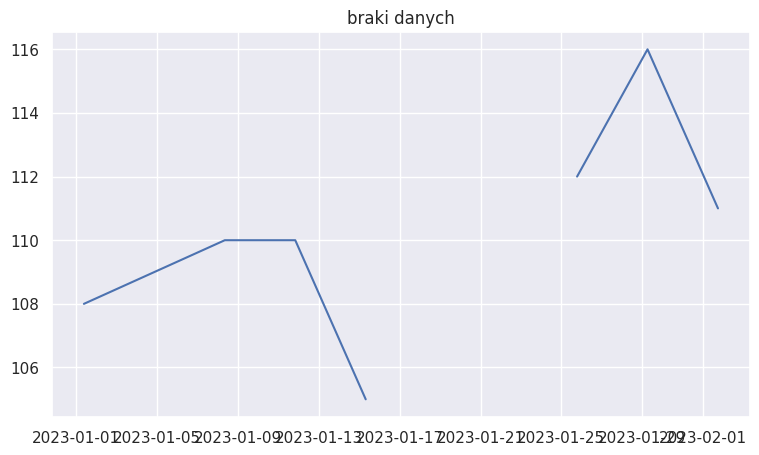

In [59]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(9,5))
plt.title('braki danych')
_ = plt.plot(df.price)

In [65]:
import plotly.express as px
df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=800, height=400,
        title = 'wykres braków buraków')


połączenie punktów z brakami danych

In [69]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400,
        title= 'szeregi - czasowe')

In [77]:
df_plotly=df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(21)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szseregi czasowe - wstawianie 21')



In [83]:
df_plotly=df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe -braki danych - wstawianie średniej')

In [88]:
df_plotly=df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe -braki danych - interpolacja')

In [90]:
df_plotly=df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe -braki danych - forward_fill')

wstawianie ostatnich zaobserwowanych wartości

In [91]:
df_plotly=df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe -braki danych - backward_fill')